# Nome: Pedro Henrique Duarte RA: 812112

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:


# Gerar dados: Y = Ax + Bx^2 + C + erro
np.random.seed(812112)
n_samples = 150
X = np.random.uniform(-10, 10, n_samples).reshape(-1, 1)
A = -2
B = 3.5
C=9
Y = A * X.flatten() + B * X.flatten()**2 + C + np.random.normal(0, 20, n_samples)
# Dividir os dados em treino, validacao e teste
X_train, X_rest, Y_train, Y_rest = train_test_split(X, Y, test_size=0.3, random_state=4220)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=4392)

In [ ]:
#help(np.random.uniform)
#help(PolynomialFeatures)
#poly=PolynomialFeatures(degree=2)
#print(X_train)
#print(poly.fit_transform((X_train)))
#X.flatten()**2

Grau 1: MSE Treino = 10959.76 | MSE Teste = 13389.59


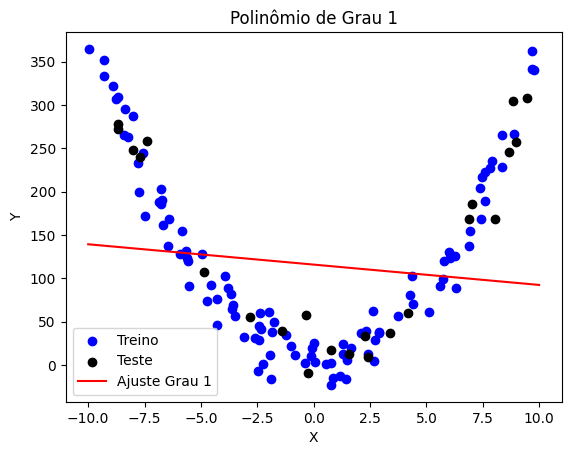

Grau 2: MSE Treino = 388.03 | MSE Teste = 540.48


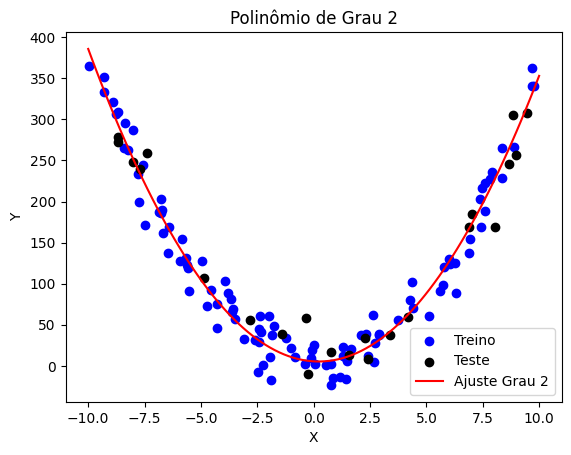

Grau 3: MSE Treino = 385.29 | MSE Teste = 541.58


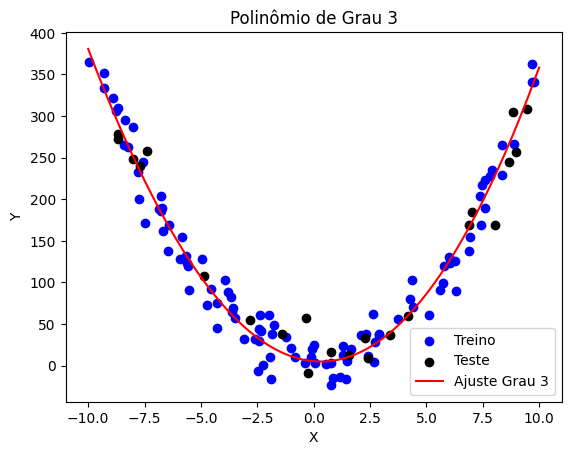

Grau 5: MSE Treino = 373.71 | MSE Teste = 553.44


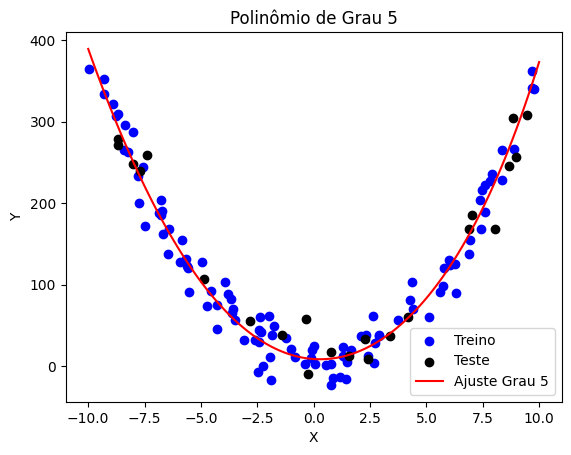

Grau 10: MSE Treino = 350.77 | MSE Teste = 666.92


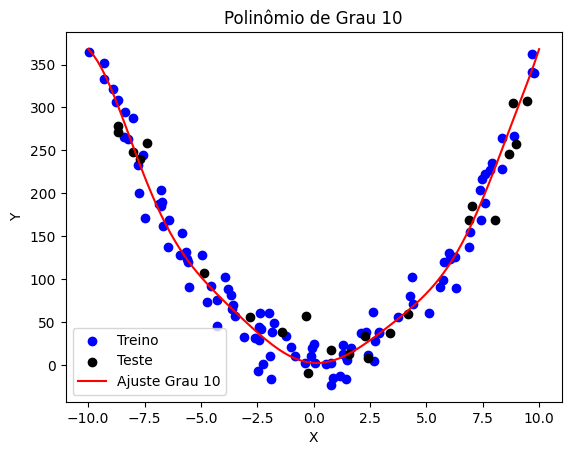

Grau 15: MSE Treino = 341.71 | MSE Teste = 686.91


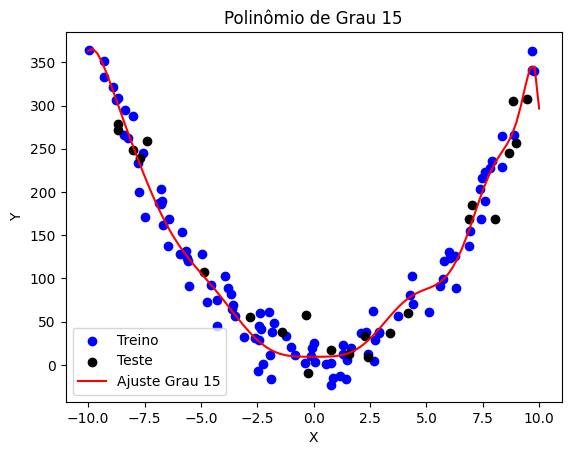

 Validação - Grau 1: MSE = 12644.27
 Validação - Grau 2: MSE = 343.56
 Validação - Grau 3: MSE = 354.97
 Validação - Grau 5: MSE = 349.08
 Validação - Grau 10: MSE = 388.62
 Validação - Grau 15: MSE = 402.03

Melhor grau escolhido com base na validação: 2


In [ ]:
degrees = [1, 2, 3, 5, 10, 15]

# Parte 1: Ajuste no treino e cálculo do erro no treino e no teste
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)

    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)

    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)

    print(f"Grau {d}: MSE Treino = {mse_train:.2f} | MSE Teste = {mse_test:.2f}")

    # Plotar cada ajuste em gráfico separado
    plt.figure()
    plt.scatter(X_train, Y_train, color='blue', label="Treino")
    plt.scatter(X_test, Y_test, color='black', label="Teste")

    X_plot = np.linspace(-10, 10, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    Y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, Y_plot, color='red', label=f"Ajuste Grau {d}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Polinômio de Grau {d}")
    plt.legend()
    plt.show()

# Parte 2: Seleção de grau via validação
val_errors = []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    Y_val_pred = model.predict(X_val_poly)
    mse = mean_squared_error(Y_val, Y_val_pred)
    val_errors.append(mse)
    print(f" Validação - Grau {d}: MSE = {mse:.2f}")

best_degree = degrees[np.argmin(val_errors)]
print(f"\nMelhor grau escolhido com base na validação: {best_degree}")